## 1

**Mathematical Formula for a Linear SVM:**

For a binary classification problem, the decision function for a linear Support Vector Machine (SVM) can be expressed as:

  *f(x)*=w⋅x+b

Where:
- w is the weight vector.
- x is the feature vector.
- b is the bias term.

The prediction is made as:

  *y*=sign(w⋅x+b)

## 2

**Objective Function of a Linear SVM:**

The objective of a linear SVM is to find the hyperplane that maximizes the margin between the two classes. The optimization problem can be formulated as:

  min(w,b)​ 1/2 ∥w∥**2+C∑(i=1 to N​)ξi​


Subject to:

y_i(w.x_i + b) ≥ 1-ξi,   ξi≥0 ∀i=1,…,N

Where:
- ξi are the slack variables that allow for misclassification.
- C is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error.

## 3

**Kernel Trick in SVM:**

The kernel trick allows SVMs to perform non-linear classification by mapping the input features into a higher-dimensional space without explicitly computing the coordinates of the data in that space. This is achieved using a kernel function \(K(\mathbf{x}_i, \mathbf{x}_j)\), which computes the dot product in the high-dimensional space:

   *K(xi​,xj​)*=ϕ(xi​)⋅ϕ(xj​)

Common kernel functions include:
- **Linear Kernel:** K(xi​,xj​)=xi​⋅xj​
- **Polynomial Kernel:** K(xi​,xj​)=(xi​⋅xj​+1)^d
- **RBF (Gaussian) Kernel:** K(xi​,xj​)=exp(−γ∥xi​−xj​∥^2)

## 4

**Role of Support Vectors in SVM:**

Support vectors are the data points that lie closest to the decision boundary (or hyperplane). They are critical in defining the position and orientation of the hyperplane. The SVM algorithm only considers these points while constructing the hyperplane, ignoring the rest of the training data.

**Example:**

Consider a 2D dataset with two classes. The support vectors are the points from each class that are nearest to the decision boundary. These points are crucial because any change in their position would affect the location of the decision boundary.

## 5

**Hyperplane:**
- The decision boundary that separates the classes.

**Marginal Plane:**
- The planes parallel to the hyperplane that pass through the support vectors. The distance between these planes is the margin.

**Hard Margin:**
- No misclassification allowed. All points are correctly classified and lie outside the margin.
  
**Soft Margin:**
- Allows some misclassification. Introduces slack variables to handle noisy data.

Here's a graphical representation:

- **Hard Margin SVM:**

![Hard Margin SVM](https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png)

- **Soft Margin SVM:**

![Soft Margin SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Svm_max_sep_hyperplane_with_margin.png/500px-Svm_max_sep_hyperplane_with_margin.png)


## 6

1. **Load the iris dataset from the scikit-learn library and split it into a training set and a testing set:**

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary classification: Select only two classes
binary_indices = y != 2
X = X[binary_indices]
y = y[binary_indices]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

2. **Train a linear SVM classifier on the training set and predict the labels for the testing set:**

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train a linear SVM classifier
clf = SVC(kernel='linear', C=1.0)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


3. **Plot the decision boundaries of the trained model using two of the features:**

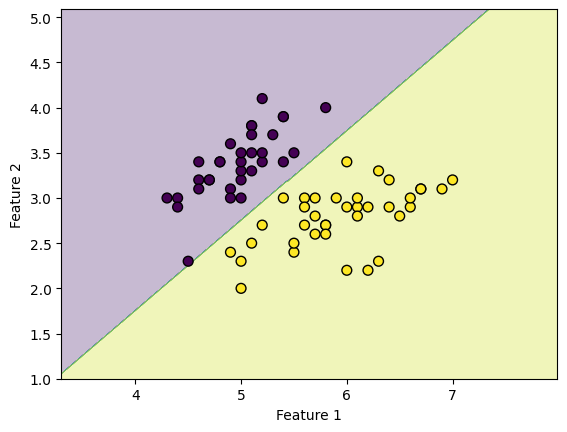

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Use only the first two features for visualization
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

# Train the model again using only two features
clf_vis = SVC(kernel='linear', C=1.0)
clf_vis.fit(X_train_vis, y_train)

# Plot the decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(clf_vis, X_train_vis, y_train)

4. **Try different values of the regularisation parameter \(C\) and see how it affects the performance of the model:**

In [9]:
for C in [0.1, 1, 10, 100]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C}, Accuracy={accuracy}')

C=0.1, Accuracy=1.0
C=1, Accuracy=1.0
C=10, Accuracy=1.0
C=100, Accuracy=1.0


### Bonus Task: Implement a linear SVM classifier from scratch using Python and compare its performance with the scikit-learn implementation.

Custom SVM Accuracy: 1.0
scikit-learn SVM Accuracy: 1.0


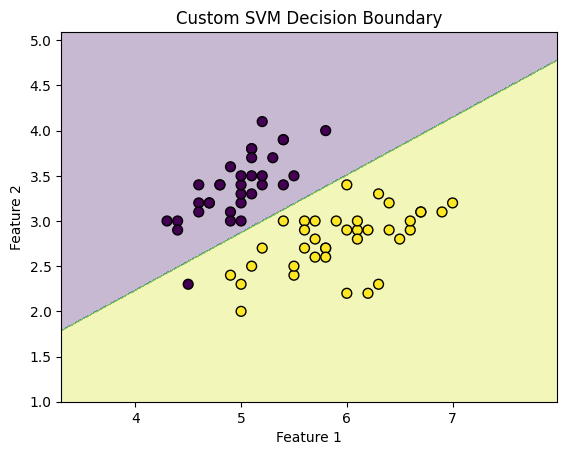

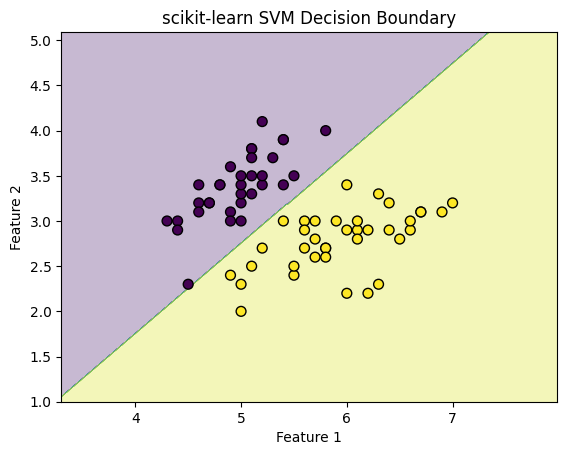

C=0.1, Accuracy=1.0
C=1, Accuracy=1.0
C=10, Accuracy=1.0
C=100, Accuracy=1.0


In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary classification: Select only two classes
binary_indices = y != 2
X = X[binary_indices]
y = y[binary_indices]

# Convert labels to -1 and 1
y = np.where(y == 0, -1, 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate the custom SVM classifier
svm_scratch = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_scratch.fit(X_train, y_train)
y_pred_scratch = svm_scratch.predict(X_test)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f'Custom SVM Accuracy: {accuracy_scratch}')

# Train and evaluate the scikit-learn SVM classifier
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'scikit-learn SVM Accuracy: {accuracy_sklearn}')

# Plot the decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot decision boundaries using only the first two features
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

# Custom SVM
svm_scratch_vis = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_scratch_vis.fit(X_train_vis, y_train)
plot_decision_boundary(svm_scratch_vis, X_train_vis, y_train, "Custom SVM Decision Boundary")

# scikit-learn SVM
svm_sklearn_vis = SVC(kernel='linear', C=1.0)
svm_sklearn_vis.fit(X_train_vis, y_train)
plot_decision_boundary(svm_sklearn_vis, X_train_vis, y_train, "scikit-learn SVM Decision Boundary")

# Try different values of the regularization parameter C
for C in [0.1, 1, 10, 100]:
    svm_sklearn = SVC(kernel='linear', C=C)
    svm_sklearn.fit(X_train, y_train)
    y_pred = svm_sklearn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'C={C}, Accuracy={accuracy}')
